In [ ]:
!pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 508 kB 4.9 MB/s 
     |████████████████████████████████| 11.2 MB 44.3 MB/s 
     |████████████████████████████████| 944 kB 44.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# Core
# %matplotlib widget
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from itertools import combinations
import math
import statistics
import scipy.stats
from scipy.stats import pearsonr
import time
from datetime import datetime
import matplotlib.dates as mdates
import dateutil.easter as easter
import plotly
import plotly.express as px

# Sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, OrdinalEncoder, SplineTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

from drive.MyDrive.Kaggle.Clustering_072022.src.functions import *

from google.colab import output
output.enable_custom_widget_manager()

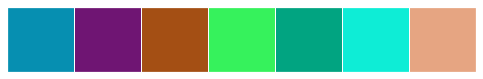

In [ ]:
#Custom Color Palette 🎨
custom_colors = ["#068fb1","#6f1573","#a44f14","#36f25c","#01a481", "#0eedd6", "#e6a582"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.style.use('ggplot')

set_seed(42)
PATH = 'drive/MyDrive/Kaggle/Clustering_072022/'
df = pd.read_csv(PATH+'src/data.csv', index_col='id')

cat_feats = df.columns[df.dtypes=='int'].tolist()
num_feats = df.columns[df.dtypes=='float'].tolist()
num_feats = num_feats[-7:]

df = df[cat_feats + num_feats]

In [ ]:
scalers = [StandardScaler(), RobustScaler(), MinMaxScaler(), MaxAbsScaler()]
transformers = [PowerTransformer(), QuantileTransformer(), SplineTransformer()]

In [ ]:
bgm = BayesianGaussianMixture(
    n_components=7,
    covariance_type='full',
    max_iter=500,
    n_init=3)
df['prediction'] = bgm.fit_predict(StandardScaler().fit_transform(df))

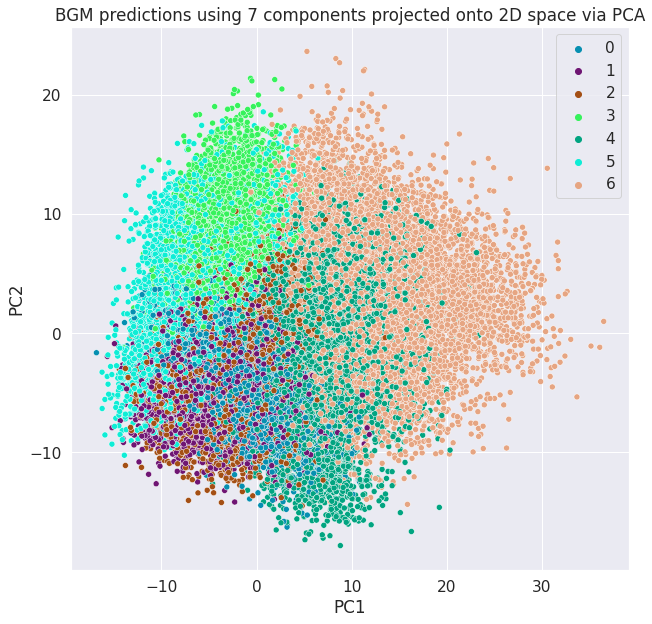

In [ ]:
pca = PCA(n_components=3)
p = pca.fit_transform(df.drop(columns='prediction'))

plt.figure(figsize=(10, 10))
sns.scatterplot(p[:, 0], p[:, 1], hue=df['prediction'], palette=custom_colors).set_title('BGM predictions using 7 components projected onto 2D space via PCA')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
pca = PCA(n_components=3)
p = pca.fit_transform(df.drop(columns='prediction'))

# 3D scatterplot
fig = px.scatter_3d(
    p, x=0, y=1, z=2, opacity = 1,
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=650, height=500,
    color=df['prediction'],
    title='3D visualization of predicted clusters using PCA dimensionality reduction',
    template='seaborn',
    color_discrete_map={0: "#068fb1", 1: "#6f1573", 2: "#a44f14", 3: "#36f25c", 4: "#01a481", 5: "#0eedd6", 6: "#e6a582" }
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

- Looking much better now that weve dropped those columns, the groups are much more defined

In [ ]:
sub = pd.DataFrame(bgm.fit_predict(df[cat_feats]))